In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle



In [85]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")
#data_semNF = pd.read_csv("nge_dados_input_semNF.csv") # jobs sem nota está emoutro método

In [86]:
data.dtypes

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_pg_word           int64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
tamanho_livro         int64
dtype: object

In [87]:
data.head(12)

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,tamanho_livro
0,224323,0,0,1,0,87,140.0,87,116142,505,742,60.0,140,2
1,224325,0,0,1,0,82,122.0,82,108307,76,94,69.0,122,2
2,225392,0,0,3,0,41,70.0,30,41144,28,24,23.0,52,1
3,225392,0,0,3,0,41,70.0,42,62913,432,696,21.0,52,1
4,225531,0,0,2,0,36,48.0,36,37548,270,456,17.0,48,0
5,228711,2,0,1,0,77,108.0,77,101967,317,517,17.0,88,1
6,226842,0,0,1,0,46,66.0,46,96474,99,114,37.0,66,1
7,227130,0,0,1,0,66,102.0,66,112888,604,872,23.0,82,1
8,228307,0,0,1,0,62,95.0,62,43155,40,73,25.0,70,1
9,228354,0,0,1,0,76,110.0,76,129122,14,10,26.0,96,1


In [88]:
data['qtd_pg_word'].unique()

array([ 87,  82,  30,  42,  36,  77,  46,  66,  62,  76,  80,  13,  34,
        52,  18,  78,  50,  47,  54,  88,  91,  38, 214,  22,  26,  92,
        14,  40,  81,  63, 216,  24,  33, 195,  29,  60,  70,  72, 107,
        85,  68,  41, 112,  45,  19,  51,  31,  56,  28,  21,  12,  17,
       131,  67, 207,  43,  86,  90,  49,  39,   1,  59,  48,  57,  73,
        23,  37])

In [89]:
data['qtd_pag_word'].unique()

array([ 87,  82,  41,  36,  77,  46,  66,  62,  76,  18,  33,  34,  57,
        22,  78,  50,  38,  54,  88,  91,  80, 214,  26,  83,  40,  81,
        63, 216,  51,  27, 195,  29,  58,  70,  92,  72, 107,  85,  67,
        24, 112,  45,  19,  31,  56,  28,  12, 158, 207,  43,  17,  86,
        90,  49, 168, 162,  20,  59,  48, 100,  39,  42,  32,  73,  23])

In [90]:
data[data['qtd_pag_word']!=data['qtd_pg_word']][['id','qtd_pag_word','qtd_pg_word','pag_final']]

,id,qtd_pag_word,qtd_pg_word,pag_final
2,225392,41,30,52
3,225392,41,42,52
10,228437,18,80,18
11,228603,33,13,40
13,228837,57,52,68
14,229294,22,18,34
18,229536,38,47,84
28,231210,83,92,112
29,230571,80,14,110
35,231890,51,52,76


In [91]:
data[(data['qtd_pg_word']-data['qtd_pag_word'])>10][['id','qtd_pag_word','qtd_pg_word','pag_final']]

,id,qtd_pag_word,qtd_pg_word,pag_final
10,228437,18,80,18
71,233893,66,77,98
74,233904,38,50,68


In [92]:
data[data['qtd_pag_word']==data['pag_final']][['id','qtd_pag_word','qtd_pg_word','pag_final']]


,id,qtd_pag_word,qtd_pg_word,pag_final
10,228437,18,80,18
84,0,168,70,168
85,0,162,70,162


In [93]:
# Deletar linha quando a quantidade de pagina do word for igual a quantidade de pagina final

# critério da diferença entre qtd pagina digitado e qtd pagina raspado do word
criterio01= ((data['qtd_pg_word']-data['qtd_pag_word'])>10)

# critério de qtd pagina digitado e qtd pagina da nota fiscal serem iguais
criterio02=(data['qtd_pag_word']==data['pag_final'])
data[(criterio02 & criterio01)][['id','qtd_pag_word','qtd_pg_word','pag_final']]


,id,qtd_pag_word,qtd_pg_word,pag_final
10,228437,18,80,18


In [94]:
# Deletar linha quando a quantidade de pagina do word for igual a quantidade de pagina final
# caso que o 
data = data[~(criterio02 & criterio01)]

In [95]:
# tentanto estatificar o dataframe
print(len(data[data["pag_final"]>149]))
print(len(data[(data["pag_final"]>59) & (data["pag_final"]<150)]))
print(len(data[data["pag_final"]<60]))

7
58
46


In [96]:
print(len(data[data["tamanho_livro"]==2]))
print(len(data[data["tamanho_livro"]==1]))
print(len(data[data["tamanho_livro"]==0]))

10
82
19


In [97]:
#data["pag_final"].to_numpy()

In [98]:
# Lambda function with if, elif & else i.e.
# If the given value is less than 10 then Multiplies it by 2
# else if it's between 10 to 20 the multiplies it by 3
# else returns the unmodified same value
#converter = lambda x : x*2 if x < 10 else (x*3 if x < 20 else x)

In [99]:
#list(map(lambda banco: banco>149, data['qtd_pag_word']))


In [100]:
#list(filter(lambda banco: banco>149, data['qtd_pag_word']))

In [101]:

#lambda_function = lambda x: x*2 if x<3 else x
#lambda_function(2)

# fazer um critério de seleção de dados:
### se o dado colhido na tabela (qtd_pag_word) tiver diferente da raspagem do word (qtd_pg_word) mais de 5 pontos deve retirar do arquivo de entrada. 
###  - incluir a coluna raspagem do word (qtd_pg_word)  para treinamento

In [102]:
data['id'].count()

111

In [103]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [104]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,tamanho_livro
count,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,224242.603604,0.279279,0.054054,1.432432,0.0,58.468468,92.504505,54.702703,82834.531532,299.027027,404.324324,26.540541,77.279279,0.918919
std,43642.966272,0.605598,0.227150,0.626993,0.0,41.329237,60.922883,38.699917,83796.069234,183.089916,236.267728,13.092527,53.474067,0.506954
min,0.000000,0.000000,0.000000,0.000000,0.0,12.000000,35.000000,1.000000,12032.000000,2.000000,2.000000,3.000000,22.000000,0.000000
25%,230752.000000,0.000000,0.000000,1.000000,0.0,32.500000,48.000000,29.000000,31167.000000,135.000000,178.000000,18.000000,45.000000,1.000000
50%,233269.000000,0.000000,0.000000,1.000000,0.0,46.000000,75.000000,46.000000,64211.000000,307.000000,424.000000,23.000000,68.000000,1.000000
75%,235309.000000,0.000000,0.000000,2.000000,0.0,74.500000,110.000000,70.000000,101969.000000,448.500000,559.500000,28.500000,90.000000,1.000000
max,235831.000000,2.000000,1.000000,3.000000,0.0,216.000000,420.000000,216.000000,571640.000000,604.000000,872.000000,71.000000,340.000000,2.000000


# Normalizar?

In [105]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [106]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [107]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

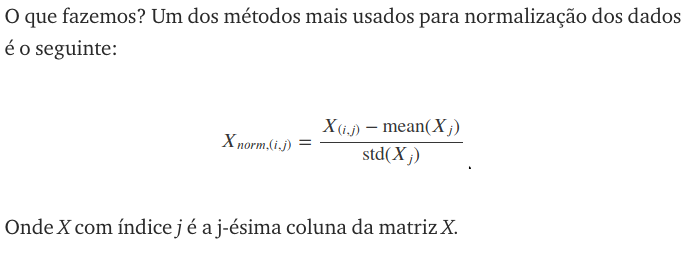

In [108]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [109]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [110]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [111]:
#
# normalizar a quantidade de caracteres
#
data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [112]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [113]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [114]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_pg_word', 'qtd_carc',
       'qtd_tabela', 'qtd_image', 'qtd_estilos', 'pag_final', 'tamanho_livro',
       'qtd_carc_normal'],
      dtype='object')

In [115]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_pg_word','qtd_tabela','qtd_image', 'qtd_carc','tamanho_livro']

#colunas_X= ['qtd_pag_word', 'qtd_pg_word','qtd_tabela','qtd_image','qtd_carc','tamanho_livro']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [116]:
X.columns

Index(['complexidade', 'entidade', 'qtd_pag_word', 'qtd_pg_word', 'qtd_tabela',
       'qtd_image', 'qtd_carc', 'tamanho_livro'],
      dtype='object')

In [117]:
# método train_test_split, Scikit-Learn 
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.10, random_state=1,stratify=X['tamanho_livro'])

In [118]:
X_train_f.shape, X_test_f.shape, y_train_f.shape, y_test_f.shape

((99, 8), (12, 8), (99, 1), (12, 1))

In [119]:
y_test_f.head()

,pag_final
71,98
20,110
39,48
17,70
69,176


In [120]:
X_train_f

,complexidade,entidade,qtd_pag_word,qtd_pg_word,qtd_tabela,qtd_image,qtd_carc,tamanho_livro
31,1,0,81,81,468,717,105732,1
74,1,0,38,50,174,298,73461,1
81,1,0,86,86,112,182,101971,1
0,1,0,87,87,505,742,116142,2
28,1,2,83,92,153,261,186373,1
...,...,...,...,...,...,...,...,...
61,1,0,56,56,516,518,87983,1
102,1,0,73,73,219,351,162582,1
99,2,0,32,33,2,2,29683,1
66,2,1,22,21,451,480,29631,1


In [121]:
X_train_f.dtypes

complexidade     int64
entidade         int64
qtd_pag_word     int64
qtd_pg_word      int64
qtd_tabela       int64
qtd_image        int64
qtd_carc         int64
tamanho_livro    int64
dtype: object

In [122]:
y_train_f

,pag_final
31,100
74,68
81,82
0,140
28,112
...,...
61,66
102,110
99,44
66,30


In [123]:
print(X_train_f.shape,y_train_f.shape)

(99, 8) (99, 1)


In [124]:
print(X_train_f.shape,y_train_f.values.ravel().shape)

(99, 8) (99,)


In [125]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

#modelo.fit(X_train_f, y_train_f)
modelo = modelo.fit(X_train_f, y_train_f.values.ravel())

# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to   (n, )

In [126]:
p = modelo.predict(X_test_f)

In [127]:
p

array([ 86,  84,  40,  76, 126,  68,  84,  48,  76,  46,  72,  38])

In [128]:
print(p.shape,y_test_f.shape)

(12,) (12, 1)


In [129]:
y_test_f

,pag_final
71,98
20,110
39,48
17,70
69,176
93,66
43,66
58,48
19,66
38,46


In [130]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_f,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046
# RMSE:  19.371957239079567
# RMSE:  53.665631459994955
# RMSE:  26.642413213111567 sem a feature quantidade de estilo
# RMSE:  28.926238482168273   ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
# RMSE:  9.302980949429841 depois de configurar split por estratificação
# RMSE:  14.142135623730951
# RMSE:  18.138357147217054

RMSE:  18.138357147217054


In [131]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-forest4a.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

In [132]:
##############################################################################################################

In [133]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [134]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [135]:
##############################################################################################################

In [136]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [137]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['id','qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['id','complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word','qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal','tamanho_livro']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [138]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1,stratify=X['tamanho_livro']) # feito com 0,10 e agora com 0,20

In [139]:
####
####   selecionar a FEATURES para MODELO
####
# mantendo algumas features para compara resultados no final no arquivo X_train_ref
X_test_ref = X_test.copy()
X_train_ref= X_train.copy()

# X_test = X_test_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]

#X_test = X_test_ref[[ 'qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]
#X_test = X_test_ref[['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]

#X_test = X_test_ref[[ 'qtd_pag_word','qtd_pg_word','qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal','tamanho_livro']]
X_test = X_test_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal','tamanho_livro']]


#X_train = X_train_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]

#X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]
#X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]

#X_train = X_train_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal','tamanho_livro']]

X_train = X_train_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal','tamanho_livro']]


In [140]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word',
       'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos', 'qtd_carc_normal',
       'tamanho_livro'],
      dtype='object')

In [141]:
X_train

,qtd_pag_word,qtd_pg_word,qtd_tabela,qtd_image,qtd_carc_normal,tamanho_livro
31,81,81,468,717,0.167439,1
74,38,50,174,298,0.109771,1
81,86,86,112,182,0.160718,1
0,87,87,505,742,0.186041,2
28,83,92,153,261,0.311541,1
...,...,...,...,...,...,...
61,56,56,516,518,0.135722,1
102,73,73,219,351,0.269028,1
99,32,33,2,2,0.031542,1
66,22,21,451,480,0.031449,1


In [142]:
y_train

,pag_final
31,100
74,68
81,82
0,140
28,112
...,...
61,66
102,110
99,44
66,30


In [143]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print('coeficientes encontrados: ',linreg.coef_) # para visualizar os coeficientes encontrados



[17.43082317]
coeficientes encontrados:  [[ 8.07911224e-01 -1.88497820e-01  4.53391258e-03 -1.19895232e-02
   1.71824976e+02  5.22766469e+00]]


In [144]:
# para visualizar os coeficientes encontrados
# para visualizar o R²
# linreg.score()

In [145]:
colunas_X

['id',
 'complexidade',
 'qtd_pag_estimado',
 'qtd_pag_word',
 'qtd_pg_word',
 'qtd_carc',
 'qtd_tabela',
 'qtd_image',
 'qtd_estilos',
 'qtd_carc_normal',
 'tamanho_livro']

In [146]:
X_train.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image',
       'qtd_carc_normal', 'tamanho_livro'],
      dtype='object')

In [147]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('id',
  array([ 8.07911224e-01, -1.88497820e-01,  4.53391258e-03, -1.19895232e-02,
          1.71824976e+02,  5.22766469e+00]))]

In [148]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [149]:
y_pred

array([[ 99.53402045],
       [103.26847065],
       [ 51.14574012],
       [ 72.39740182],
       [188.01435382],
       [ 70.89937871],
       [ 89.71095552],
       [ 42.25276389],
       [ 72.29857782],
       [ 35.69890152],
       [ 50.34248036],
       [ 32.75848843]])

In [150]:
y_test

,pag_final
71,98
20,110
39,48
17,70
69,176
93,66
43,66
58,48
19,66
38,46


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [151]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [152]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',RMSE_1)

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43
# RMSE:  12.051420343980208
# RMSE:  9.782602553564418 => melhorou quando retirou feature complexidade
# RMSE:  9.16223875809479 => melhorou quando retirou feature quantidade de estilos
# RMSE:  4.5881270718708045 => melhorou MUITO depois de verificar os arquivo word que estavam errados
# RMSE:  4.303364983662433 => melhorou quando alterei arquivos do WORD

# Campos em análise [['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']]
#RMSE:  12.051420343982636
# RMSE:  16.219875583371206
#RMSE:  14.883956821122942

RMSE:  11.046774596908435


In [153]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word',
       'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos', 'qtd_carc_normal',
       'tamanho_livro'],
      dtype='object')

In [154]:
X_test.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image',
       'qtd_carc_normal', 'tamanho_livro'],
      dtype='object')

In [155]:
#
#
# comparar erros de calculo do campo Num Página estimado com o QTD_PAG_INFERIDO
#
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test,X_test_ref['qtd_pag_estimado']))
print('RMSE: ',RMSE_2)
print ('Percentual entre os dois métodos: ', (RMSE_2-RMSE_1)/RMSE_1)

RMSE:  19.964551919172475
Percentual entre os dois métodos:  0.8072743083542033


### Avaliação dos Resultados
- RMSE:  4.5881270718708045, ou seja, erro médio de 4 páginas  - com dados do modelo de Machine Learning (ML)
- RMSE:  13.010485281984192, ou seja, erro médio de 15 páginas - com dados estimados da Editorar
- diferença de 83% , ou seja, os dados estimados da Editorar está 83% acima dos dados do Modelo de ML

In [156]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976
# RMSE:  12.43000991830557
# RMSE:  14.428565435305106


In [157]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-linreg3.sav'
pickle.dump(linreg, open(filename, 'wb'))
 


In [158]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [159]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [160]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
colunas_X= ['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal','tamanho_livro']

#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']

colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1,stratify=X['tamanho_livro'])

In [162]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# modelo = LogisticRegression()
# modelo.fit(X_treino, y_treino)
# p = modelo.predict(X_valid)



print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


[ 84  68  84  76 340  98  84  98  76  34  98  48]
[[1.34188332e-06 8.54104038e-06 2.52192592e-03 2.49569734e-07
  2.63212114e-04 5.82752371e-03 4.42258037e-03 5.30499498e-04
  1.05874154e-01 9.93100720e-04 3.91753141e-03 3.15834457e-03
  6.79510296e-02 3.44075005e-05 3.62725372e-02 5.71060379e-02
  9.98455300e-03 4.57576981e-02 1.25280394e-02 3.96572449e-03
  4.62741936e-02 1.05714654e-02 3.05856820e-01 1.01205564e-01
  5.07885976e-03 1.96597564e-03 3.44741652e-02 8.53199717e-05
  6.08118315e-03 1.35137345e-02 6.07444825e-02 2.40803715e-03
  1.13845158e-05 1.40718666e-03 8.21609053e-07 1.83928316e-02
  7.39505358e-03 8.68103237e-11 3.23054186e-11 1.79102309e-14
  2.33859363e-02 2.79535005e-05]
 [7.02357886e-10 4.99810938e-05 2.48536455e-03 2.28633603e-05
  5.38419365e-02 5.74587170e-03 4.06370955e-02 1.18473958e-04
  5.73358621e-06 2.21264460e-04 2.79198742e-02 6.90902607e-02
  5.42934406e-03 3.99115758e-03 2.14022013e-09 1.43688839e-01
  7.48877925e-04 8.52976381e-04 4.50949039e-02 4.

/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test.T)

[ 84  68  84  76 340  98  84  98  76  34  98  48]
           71   20  39  17   69  93  43  58  19  38  27  15
pag_final  98  110  48  70  176  66  66  48  66  46  72  28


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# RMSE:  26.17424132789543 => Features ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']

# quantidade de estilo é muito relevante nesse modelo, sem essa feature RMSE:  106.26211160915429
# RMSE:  92.03951720469163 Para essa features ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
# RMSE:  19.521549863955705


RMSE:  54.28013755816517


In [165]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-log2.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

# Modelos treinados salvo em:
- finalized_model-forest3a.sav
- finalized_model-linreg.sav
- finalized_model-log.sav

In [ ]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [ ]:
#
# 
################################################################################################################

In [ ]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))